# Welcome to The Online Book Reccomendation System Nootbook

## A breif intro to reccomendation Engines

- Content-Based filtering
- Collabirative Based filtering
- Popularity Based filtering

In [155]:
pip install scikit-learn


                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 435.7 kB/s eta 0:00:19
                                              0.0/8.3 MB 435.7 kB/s eta 0:00:19
                                              0.0/8.3 MB 435.7 kB/s eta 0:00:19
                                              0.0/8.3 MB 435.7 kB/s eta 0:00:19
                                              0.0/8.3 MB 130.7 kB/s eta 0:01:04
                                              0.1/8.3 MB 192.5 kB/s eta 0:00:43
                                              0.1/8.3 MB 249.8 kB/s eta 0:00:33
                                              0.1/8.3 MB 284.4 kB/s eta 0:00:29
                                              0.1/8.3 MB 284.4 kB/s eta 0:00:29
                                              0.1/8.3 MB 240.2 kB/s eta 0:00:35
                                              0.2/8.3 MB 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import style
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
plt.style.use('ggplot')

In [2]:
users=pd.read_csv('Users.csv')
books=pd.read_csv('Books.csv',parse_dates=['Year-Of-Publication'])
ratings=pd.read_csv('Ratings.csv')

# Exploratory Data Analysis

In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [50]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [52]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [54]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- The Age Column has a lot of Nans and we may have to fill them with the median because currently we don't need the age column
- Ratings and Books Dataframes are pretty clean

In [56]:
books.isnull().sum()
books.dropna(inplace=True)

In [6]:
#Filling Nan values
users['Age'].fillna(int(users['Age'].mean()),inplace=True)

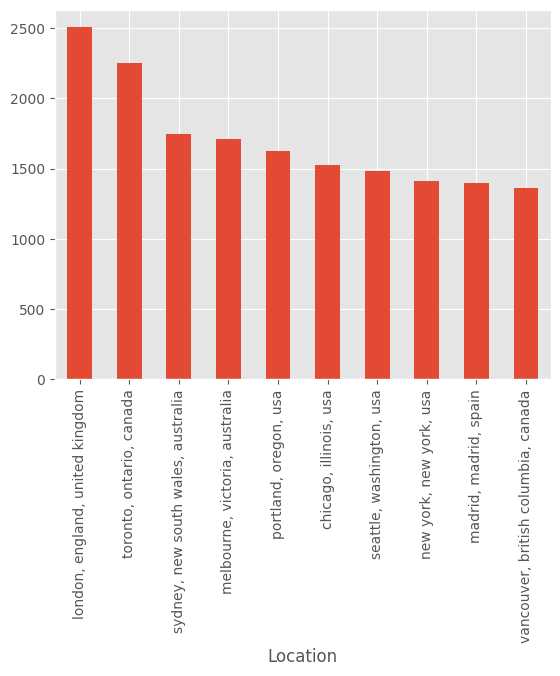

<Figure size 200x1000 with 0 Axes>

In [58]:
#where are our users mostly from
users['Location'].value_counts(ascending=False)[0:10].plot(kind='bar')
plt.figure(figsize=(2,10))
plt.show()

- Users are Mostly form The UK-London, Canda-Toronto and Australia-Sydne

<Axes: >

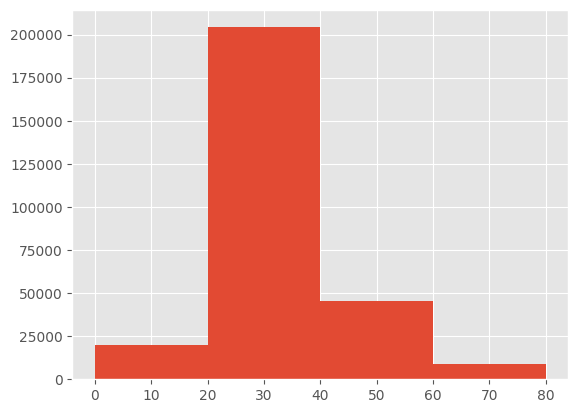

In [59]:
bins=np.arange(0,100,20)
users['Age'].hist(bins=bins)

- The histograms of the ages is right-skewed and this is an indicator that younger people tend to 
    
  purchase more books in our data mostly the mean of the people ho purchase books is between 30-40

In [7]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


The number of reviews in the data set is 1149780 and the mean book review is around 2.8 with a std of 3.8

<Axes: >

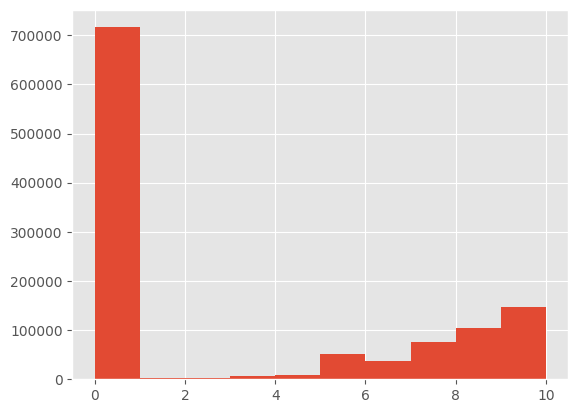

In [61]:
ratings['Book-Rating'].hist()

- Almost 700000 books are rated with zero which is pretty high number that needs more investigation

In [62]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271353 non-null  object
 1   Book-Title           271353 non-null  object
 2   Book-Author          271353 non-null  object
 3   Year-Of-Publication  271353 non-null  object
 4   Publisher            271353 non-null  object
 5   Image-URL-S          271353 non-null  object
 6   Image-URL-M          271353 non-null  object
 7   Image-URL-L          271353 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


# Creating Merged data Frames

In [8]:
books_with_ratings=books.merge(ratings,on='ISBN',how='left')
books_with_ratings.shape

(1032345, 10)

In [9]:
books_with_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')

In [10]:
#Getting the most popular 50 books in the data 
popular_books_ratings=books_with_ratings.groupby('Book-Title').agg({'Book-Rating':'count'}).sort_values(ascending=False,by='Book-Rating').reset_index()
popular_books_ratings.rename(columns={'Book-Rating':'Num_Of_Ratings'},inplace=True)

In [11]:
books_with_ratings['Book-Rating'].fillna(books_with_ratings['Book-Rating'].mean())

0          0.0
1          5.0
2          0.0
3          8.0
4          0.0
          ... 
1032340    7.0
1032341    4.0
1032342    0.0
1032343    0.0
1032344    0.0
Name: Book-Rating, Length: 1032345, dtype: float64

In [12]:
#Find the average rating and merge it to this data frame
avg_ratings=books_with_ratings.groupby('Book-Title').agg({'Book-Rating':'mean'}).sort_values(ascending=False,by='Book-Rating').reset_index()
avg_ratings.rename(columns={'Book-Rating':'Avg_Ratings'},inplace=True)
avg_ratings.fillna(books_with_ratings['Book-Rating'].mean(),inplace=True)
avg_ratings.head()

,Book-Title,Avg_Ratings
0,Film Is: The International Free Cinema,10.0
1,More Secrets of Happy Children: Embrace Your P...,10.0
2,Jo's Boys : From the Original Publisher,10.0
3,The Vanished Priestess : An Annie Szabo Mystery,10.0
4,Game and Hunting,10.0


In [14]:
final_movie_ratings=popular_books_ratings.merge(avg_ratings,on='Book-Title')
final_movie_ratings.isna().sum()

Book-Title        0
Num_Of_Ratings    0
Avg_Ratings       0
dtype: int64

In [15]:
final_movie_ratings=final_movie_ratings[final_movie_ratings['Num_Of_Ratings']>200].sort_values(by='Avg_Ratings',ascending=False).reset_index()
final_movie_ratings=final_movie_ratings.head(50)
final_movie_ratings.head()

,index,Book-Title,Num_Of_Ratings,Avg_Ratings
0,59,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
1,69,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
2,140,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
3,87,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
4,187,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639


In [16]:
full_common_books=final_movie_ratings.merge(books,on='Book-Title').reset_index(drop=True)
full_common_books.drop(['index'],axis=1,inplace=True)
full_common_books.drop_duplicates('Book-Title',inplace=True)
full_common_books.head()

,Book-Title,Num_Of_Ratings,Avg_Ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,0312853238,Orson Scott Card,1992,Tor Books,http://images.amazon.com/images/P/0312853238.0...,http://images.amazon.com/images/P/0312853238.0...,http://images.amazon.com/images/P/0312853238.0...


# Collabrative Based Reccomendations
1- Merge the Data Frames to make the information in one data frame

2- Create pivot table of item-item rating

3-Find cosine distance for all the matrix

4-Find the colsest match to a movie by similarity matirx

In [17]:
full_merged_table=users.merge(books_with_ratings,on='User-ID').drop(["Age","Location"],axis=1)
full_merged_table.head()

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating
0,2,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
1,8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
2,8,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
3,8,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
4,8,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0


### Reducing The matrix to the users who vote more than 50 times and the books which are rated more than 200 times

In [210]:
mask=full_merged_table.groupby('User-ID').count()['Book-Rating']>200
index_of_books=mask[mask].index
filtered_data=full_merged_table[full_merged_table['User-ID'].isin(index_of_books)]
mask2=filtered_data.groupby('Book-Title').count()['Book-Rating']>50
index_of_people=mask2[mask2].index
filtered_data=filtered_data[filtered_data['Book-Title'].isin(index_of_people)]
filtered_data.head()


,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating
311,254,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,0.0
312,254,0316769487,The Catcher in the Rye,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,0.0
313,254,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,0.0
334,254,037582345X,"The Golden Compass (His Dark Materials, Book 1)",PHILIP PULLMAN,2002,Knopf Books for Young Readers,http://images.amazon.com/images/P/037582345X.0...,http://images.amazon.com/images/P/037582345X.0...,http://images.amazon.com/images/P/037582345X.0...,9.0
335,254,0375823468,"The Subtle Knife (His Dark Materials, Book 2)",PHILIP PULLMAN,2002,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375823468.0...,http://images.amazon.com/images/P/0375823468.0...,http://images.amazon.com/images/P/0375823468.0...,9.0


In [150]:
filtered_data['Book-Title'].nunique()

679

In [151]:
pivot_user_data= pd.pivot_table(filtered_data,index=['Book-Title'], columns ='User-ID', values = "Book-Rating")
pivot_user_data

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [152]:
#subctract the average rating from each value to be centered around the mean
avg_rating=pivot_user_data.mean(axis=1)
pivot_user_data_centered=pivot_user_data.sub(avg_rating,axis=0)
pivot_user_data_centered=pivot_user_data_centered.fillna(0)
pivot_user_data_centered

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,5.782828,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,6.782828,0.000000,0.0,0.0,0.000000,0.000000,-3.217172,0.0,0.000000,0.0
1st to Die: A Novel,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,6.718543,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2nd Chance,0.000000,7.588496,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-2.411504,...,0.000000,0.000000,0.0,0.0,0.000000,-2.411504,0.000000,0.0,-2.411504,0.0
4 Blondes,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.985714,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
A Bend in the Road,-1.637615,0.000000,5.362385,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,-1.637615,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.000000,0.000000,0.000000,3.929825,0.000000,0.0,0.0,0.000000,0.000000,-3.070175,...,0.000000,5.929825,0.0,0.0,0.000000,0.000000,-3.070175,0.0,0.000000,0.0
You Belong To Me,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-1.545455,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.000000,0.000000,0.000000,0.000000,-1.983333,0.0,0.0,-1.983333,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-1.983333,0.0,0.000000,0.0


In [159]:
similarity_matrix=cosine_similarity(pivot_user_data_centered)
booke_names=pivot_user_data_centered.index
similarity_df=pd.DataFrame(similarity_matrix,index=booke_names,columns=booke_names)
similarity_df

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.017152,-0.000643,-0.054157,0.031797,-0.010958,-0.002566,0.105005,-0.001102,-0.034336,...,0.030677,-0.012396,-0.006776,0.098105,0.047728,0.041950,-0.005501,0.076059,0.026550,-0.002232
1st to Die: A Novel,0.017152,1.000000,0.133646,-0.017325,0.065610,0.076896,0.087363,0.181073,0.073065,0.006082,...,-0.017027,0.057836,0.091705,0.052498,0.045251,-0.023390,0.170276,0.038474,0.146908,0.068176
2nd Chance,-0.000643,0.133646,1.000000,0.018058,0.017984,0.072898,-0.010741,0.094910,0.064407,0.005293,...,0.088783,0.112975,-0.016300,0.049215,0.012435,0.003228,0.134364,0.008878,0.024976,0.129601
4 Blondes,-0.054157,-0.017325,0.018058,1.000000,-0.027710,0.088802,-0.010116,0.008261,0.073634,0.023015,...,0.024931,-0.011098,-0.041334,0.013801,0.105399,0.075041,0.081537,0.011833,-0.001765,0.015640
A Bend in the Road,0.031797,0.065610,0.017984,-0.027710,1.000000,0.087422,0.084730,0.060904,0.036961,-0.020734,...,0.051787,0.032263,-0.015513,0.067346,-0.012746,-0.025893,0.034074,0.026751,0.053636,0.002991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.041950,-0.023390,0.003228,0.075041,-0.025893,-0.009673,0.028578,0.049305,0.028462,0.032451,...,0.138776,0.015943,-0.019275,-0.061626,-0.004187,1.000000,-0.023840,-0.018502,0.035018,-0.037684
You Belong To Me,-0.005501,0.170276,0.134364,0.081537,0.034074,0.086184,0.054412,0.047059,0.052942,0.137845,...,0.189740,0.152949,0.018835,-0.020714,0.031752,-0.023840,1.000000,0.034771,0.197232,0.144600
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.076059,0.038474,0.008878,0.011833,0.026751,0.071833,0.025342,0.059994,0.158344,0.003509,...,0.026276,0.049239,-0.002037,0.160197,-0.024772,-0.018502,0.034771,1.000000,0.057120,0.011133


In [186]:
#Finding similar books
def reccomend_books(book_name):
    cosine_sim=similarity_df.loc[book_name]
    cosine_sim=cosine_sim.sort_values(ascending=False)[1:6]
    Books=cosine_sim.index
    distances=cosine_sim.values
    return Books,distances

In [188]:
reccomend_books("Zen and the Art of Motorcycle Maintenance: An Inquiry into Values")

(Index(['Prodigal Summer', 'Pet Sematary', 'The Reef', 'Cry Wolf',
        'That Camden Summer'],
       dtype='object', name='Book-Title'),
 array([0.2358898 , 0.23314333, 0.20864235, 0.18965908, 0.18553888]))

In [19]:
import pickle
pickle.dump(full_common_books,open('top50boock.pkl','wb'))

In [190]:
pickle.dump(similarity_df,open('similaritymatrix.pkl','wb'))

In [195]:
similarity_df.to_csv('similarity_df.csv')

In [212]:
recco_data=filtered_data.drop_duplicates(['Book-Title'])
recco_data.to_csv('recco_data.csv')